## TESTING THE DECISION TREE

The Iris dataset (https://archive.ics.uci.edu/dataset/53/iris) is among the most common benchmarks for decision trees. It contains values for three species of iris flowers classified by sepal and petal length/width. Let us load the dataset and fit a decision tree to see how it performs.

In [1]:
import sys
sys.path.append('../')
import pandas as pd
from DecisionTree.tree import *
from Dataset.dataset import *

The data is split into training and testing, then preprocessed: **The input must be a pandas dataframe containing the target column**.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_iris(return_X_y=True, as_frame=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
iris_df = pd.concat([X_train,y_train], axis=1).reset_index(drop=True)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.8,2.6,4.0,1.2,1
1,4.9,3.1,1.5,0.2,0
2,7.9,3.8,6.4,2.0,2
3,4.8,3.4,1.6,0.2,0
4,4.5,2.3,1.3,0.3,0


#### Fit and Print the decision tree

Here, we set the maximum authorized depth to 8 and the minimum samples per leaf to its default value of 2.
Note that the depth of the tree below is actually inferior to 8 which suggest it succeeded to obtains only pure leafs on the training set.

In [3]:
iris_dataset = Dataset(iris_df, 'target')
tree = DecisionTree(iris_dataset)
tree.fit(max_depth=8, min_samples=2)
tree.print(tree.root)

|--- Is petal length (cm) <= 1.9?
|   |--- True:
|   |--- class: 0.0
|   |--- False:
|   |--- Is petal width (cm) <= 1.7?
|   |   |--- True:
|   |   |--- Is petal length (cm) <= 5.1?
|   |   |   |--- True:
|   |   |   |--- Is sepal length (cm) <= 4.9?
|   |   |   |   |--- True:
|   |   |   |   |--- class: 2.0
|   |   |   |   |--- False:
|   |   |   |   |--- class: 1.0
|   |   |   |--- False:
|   |   |   |--- class: 2.0
|   |   |--- False:
|   |   |--- Is petal length (cm) <= 4.8?
|   |   |   |--- True:
|   |   |   |--- Is sepal length (cm) <= 5.9?
|   |   |   |   |--- True:
|   |   |   |   |--- class: 1.0
|   |   |   |   |--- False:
|   |   |   |   |--- class: 2.0
|   |   |   |--- False:
|   |   |   |--- class: 2.0


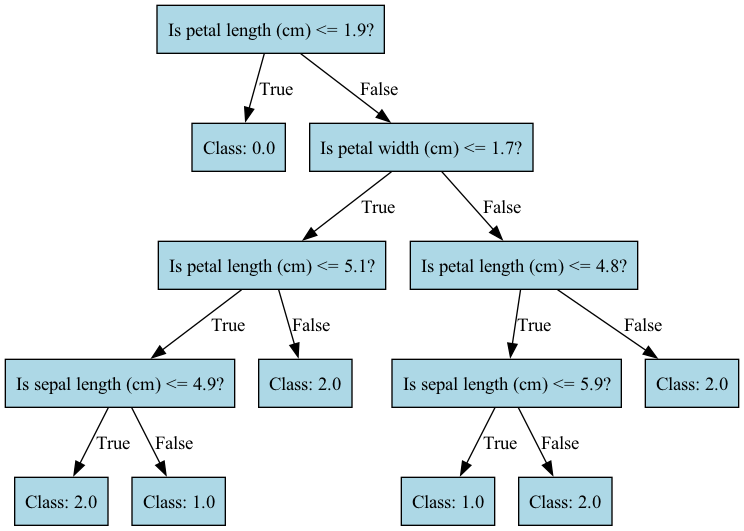

In [4]:
tree.plot()

#### Compare predictions with targets

In [5]:
predictions = tree.predict(X_test)
result = pd.concat([predictions, y_test.reset_index(drop=True)], axis=1)
result.columns = ['predictions', 'targets']

result.head()

,predictions,targets
0,0.0,0
1,0.0,0
2,1.0,1
3,1.0,1
4,0.0,0
